In [3]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

Задача 5

Генерация данных

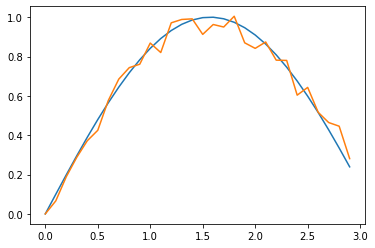

In [103]:
xs = np.arange(0.0, 3, 0.1)
ys = np.sin(xs)
plt.plot(xs, ys)
ys = ys + np.random.normal(0, 0.05, len(xs))
plt.plot(xs, ys)

In [118]:
kf = KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(xs):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 0  1  5  6  7  8  9 10 12 13 14 15 16 20 22 23 24 27 28 29] TEST: [ 2  3  4 11 17 18 19 21 25 26]
TRAIN: [ 0  2  3  4  6  7 10 11 12 14 16 17 18 19 20 21 23 24 25 26] TEST: [ 1  5  8  9 13 15 22 27 28 29]
TRAIN: [ 1  2  3  4  5  8  9 11 13 15 17 18 19 21 22 25 26 27 28 29] TEST: [ 0  6  7 10 12 14 16 20 23 24]


Градиентный спуск

In [105]:
def generatePolynomialFeatureMatrix(xs, deg=5):
    return xs.reshape(-1, 1) ** np.arange(0, deg + 1)


In [119]:
def L1RegGradStep(X, ys, w, mu=0.1, lr=1):
    w = w.reshape(-1, 1)
    ys = ys.reshape(-1, 1)
    grad = 2 * X.T @ (X @ w - ys) + mu * np.sign(w)
    return w - lr * grad

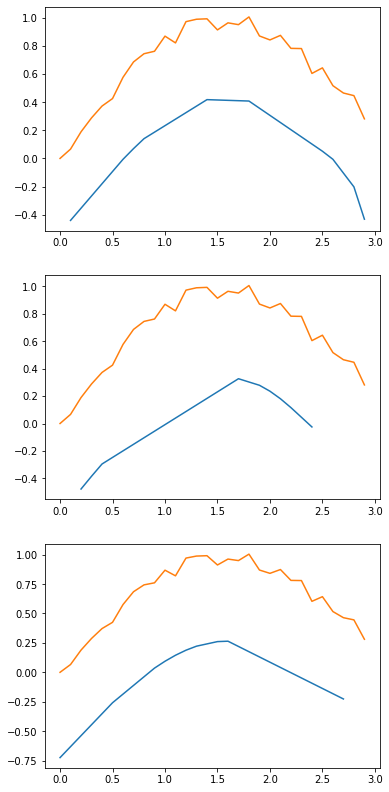

In [136]:
deg = 30
fig, plots = plt.subplots(3, figsize=(6, 14))
ind = 0
for train_index, test_index in kf.split(xs):
    x_train = xs[train_index]
    x_test = xs[test_index]
    y_train = ys[train_index]
    y_test = ys[test_index]
    
    X_train = generatePolynomialFeatureMatrix(x_train, deg=deg)
    X_test = generatePolynomialFeatureMatrix(x_test, deg=deg) 
    
    M_train = np.ones((X_train.shape[0], 1)) @ np.mean(X_train, axis=0).reshape(1, -1)
    stds_train = np.std(X_train, axis=0)
    T_train = np.diag(1 / np.where(stds_train == 0, 1, stds))
    X_train1 = (X_train - M_train)@T_train
    X_train1[:, 0] = np.ones(X_train.shape[0])
    
    M_test = np.ones((X_test.shape[0], 1)) @ np.mean(X_test, axis=0).reshape(1, -1)
    stds_test = np.std(X_test, axis=0)
    T_test = np.diag(1 / np.where(stds_test == 0, 1, stds))
    X_test1 = (X_test - M_test)@T_test
    X_test1[:, 0] = np.ones(X_test.shape[0])
    
    w0 = np.random.normal(0, 0.1, deg + 1).reshape(-1, 1)
    w = w0
    for _ in range(10000):
        w = L1RegGradStep(X_train1, y_train, w, mu=0.0, lr=0.001)
    # y_predicted = X @ T @ w - M @ T @ w
    # print(np.linalg.norm(y))
    y_train_predicted = X_train1 @ w
    # y_test_predicted = X_test @ T_test @ w - M_test @ T_test @ w
    plots[ind].plot(x_test, y_test_predicted)
    plots[ind].plot(xs, ys)
    ind += 1

Задача 4

In [48]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import seaborn as sns
import pandas as pd

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631991.5781277422, tolerance: 262.1009124434389
  positive)


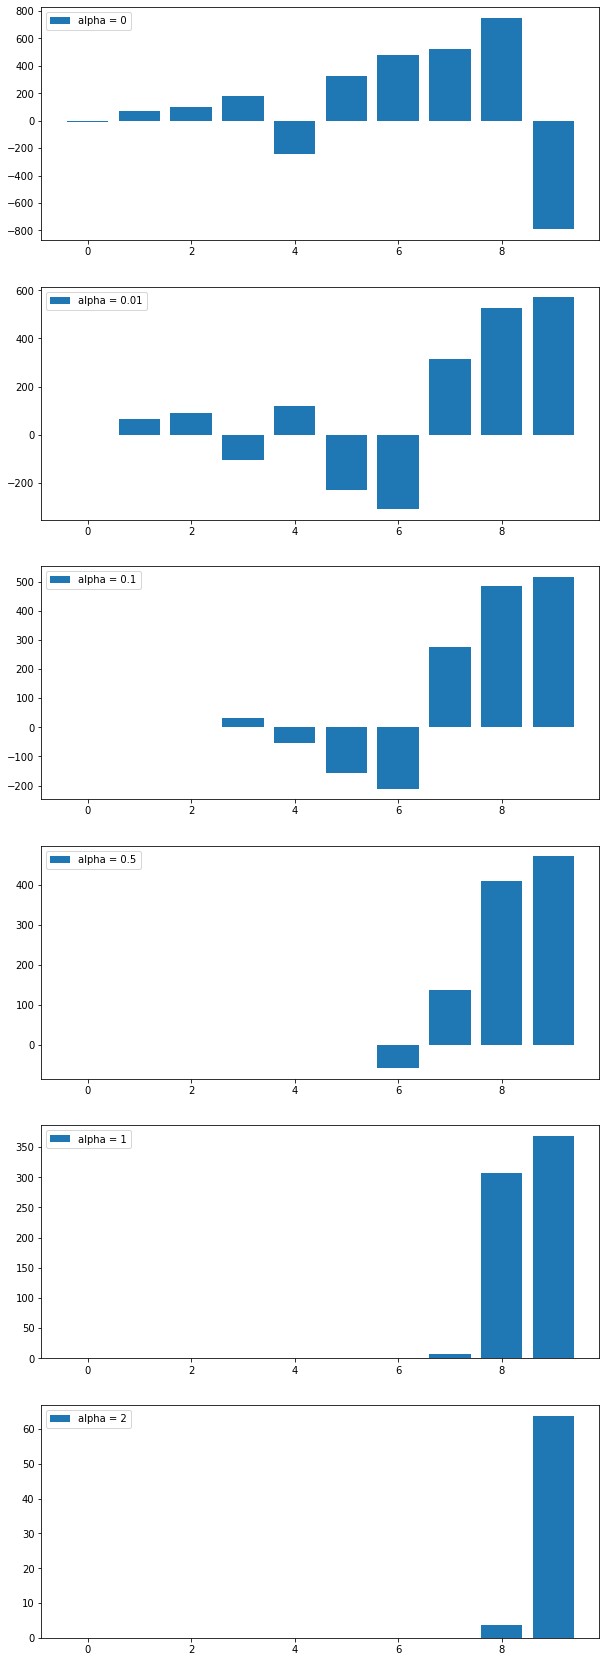

In [82]:
data, target = load_diabetes(return_X_y=True)
alphas = [0, 0.01, 0.1, 0.5, 1, 2]
bars = []
for i in range(len(alphas)):
    ls = Lasso(alpha=alphas[i])
    ls.fit(data, target)
    tmp = ls.coef_
    tmp = sorted(tmp, key=abs)
    bars.append(tmp)
fig, plots = plt.subplots(len(alphas), figsize=(10, 30))
for i in range(len(alphas)):
    plots[i].bar(np.array(range(len(bars[i]))), bars[i], label='alpha = ' + str(alphas[i]))
    plots[i].legend()
